# Customer Market Segmentation using Unsupervised Machine Learning

In [73]:
#Importing Libraries

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [75]:
#import Dataset

In [76]:
creditcard_df=pd.read_csv('marketing_data.csv')

In [77]:
#print dataset

In [78]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [79]:
#print information about the dataset

In [80]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [81]:
#print minimum max and min of balance column

In [82]:
creditcard_df['BALANCE'].mean()

1564.4748276781038

In [83]:
creditcard_df['BALANCE'].max()

19043.13856

In [84]:
creditcard_df['BALANCE'].min()

0.0

In [14]:
# the describe function give more statistic information about the data

In [15]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [16]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [17]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [18]:
creditcard_df[creditcard_df['CASH_ADVANCE']==47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [24]:
#Visualization Of Dataset
#Data visualization helps to tell stories by curating data into a form easier to understand
#apply some preprosessing methods

In [25]:
#heatmap show user behaviour on specific webpages or webpage templates.

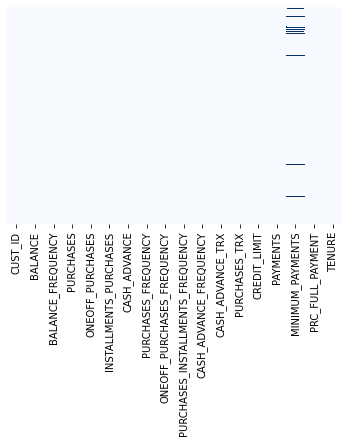

In [26]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False, cbar=False, cmap="Blues")

In [27]:
#check for null values

In [28]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [29]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=creditcard_df['MINIMUM_PAYMENTS'].mean()

In [30]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [31]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=creditcard_df['CREDIT_LIMIT'].mean()

In [32]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

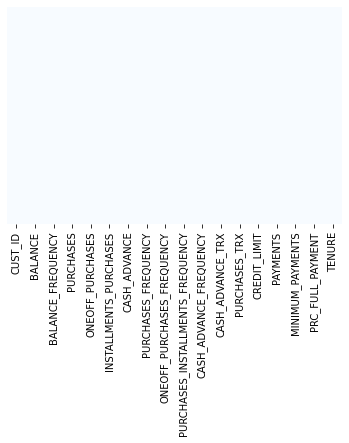

In [33]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False, cbar=False, cmap="Blues")

In [34]:
#checking duplicate entries in the dataset

In [35]:
creditcard_df.duplicated().sum()

0

In [36]:
creditcard_df.drop('CUST_ID', axis=1,inplace=True)

In [37]:
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [38]:
len(creditcard_df.columns)

17

In [39]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [40]:
#displot combination of matplotlib.hist function and seaborn kdeplot()
#KDE-kernal density estimate
#KDE for visualising probibilty density of a contionous varibales

C:\Users\NAZIRAHMADNAZIR\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


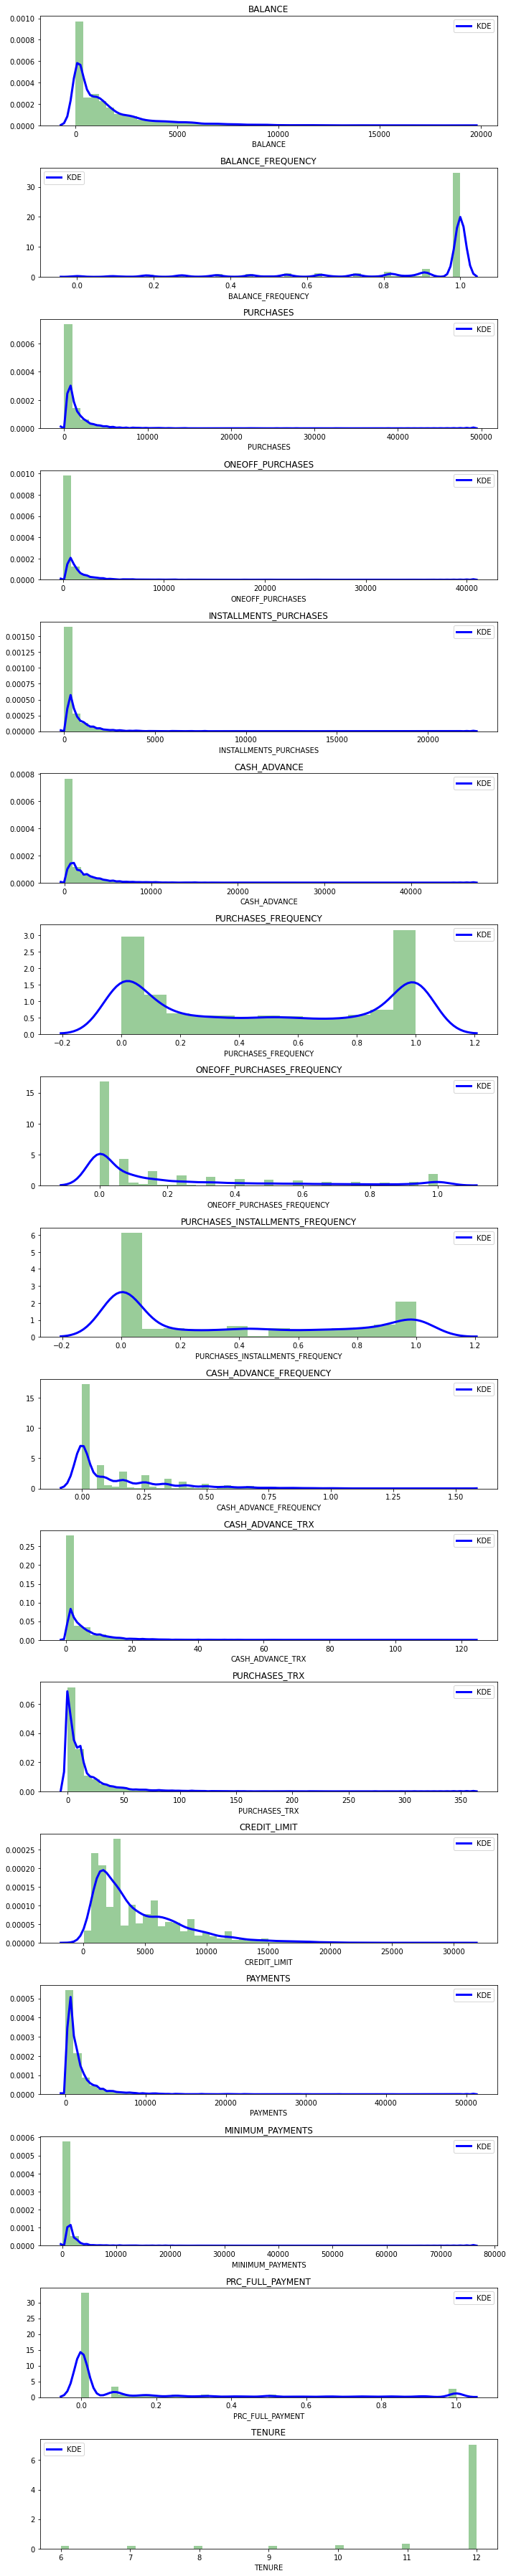

In [41]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
    plt.title(creditcard_df.columns[i])
    
plt.tight_layout()

In [42]:
#correlation matrix btw features
#heatmap tells the colleration

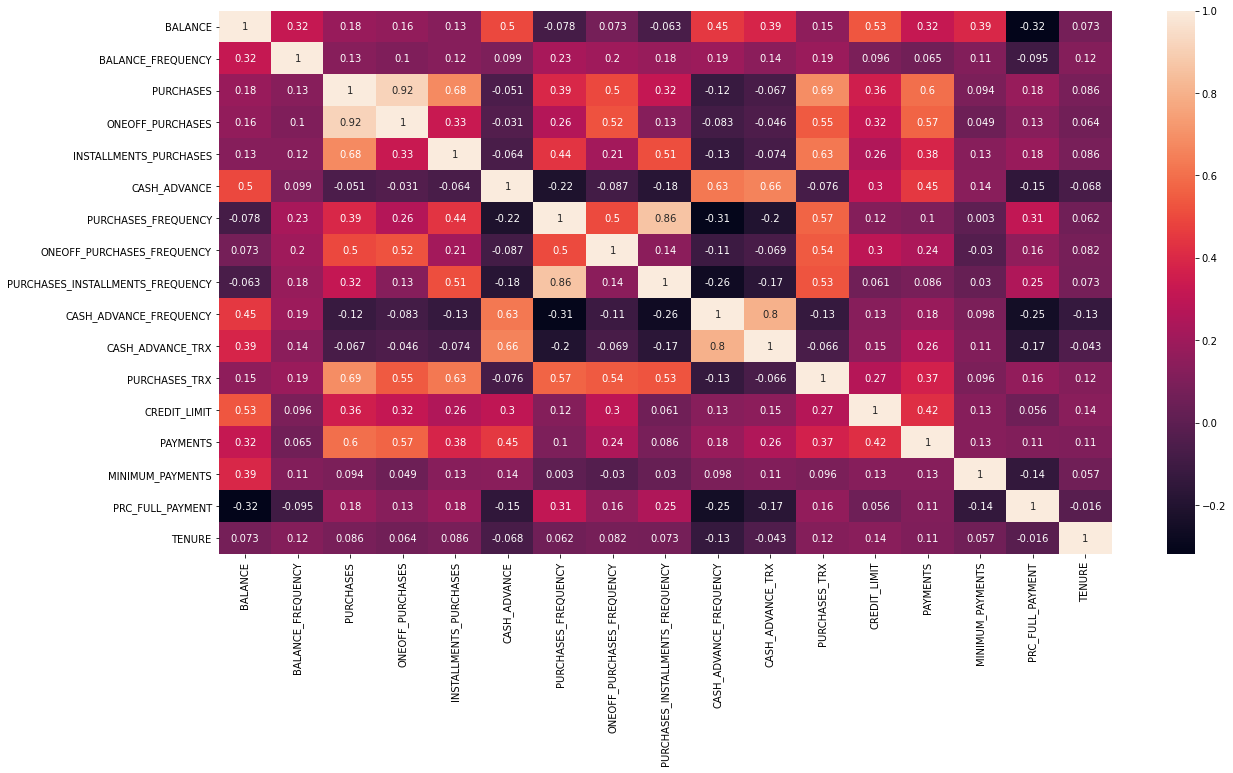

In [43]:
correlations=creditcard_df.corr()
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(correlations,annot=True)

# Kmeans algorithm

In [44]:
#Elbow Method
#In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. 

In [45]:
#scale data
scaler=StandardScaler()
creditcard_df_s=scaler.fit_transform(creditcard_df)

In [46]:
creditcard_df_s.shape

(8950, 17)

In [56]:
creditcard_df_s

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

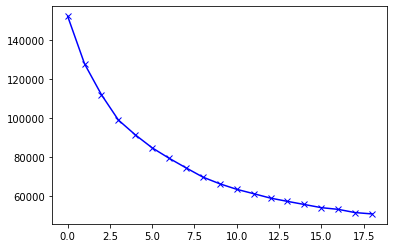

In [60]:
scores=[]
range_values=range(1,20)
for i in range_values:
    kmean=KMeans(n_clusters=i)
    kmean.fit(creditcard_df_s)
    scores.append(kmean.inertia_)
plt.plot(scores,'bx-')

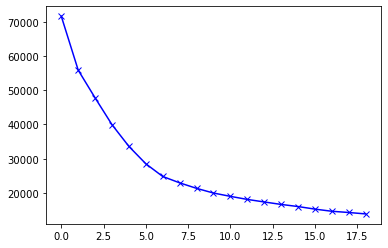

In [47]:
#optimal number of clusters for the first 8 numbers
scores=[]
range_values=range(1,20)
for i in range_values:
    kmean=KMeans(n_clusters=i)
    kmean.fit(creditcard_df_s[:,:8])
    scores.append(kmean.inertia_)
plt.plot(scores,'bx-')

# Apply Kmeans method

In [48]:
kmeans=KMeans(7)
kmeans.fit(creditcard_df_s)
label =kmeans.labels_
label

array([6, 3, 2, ..., 4, 6, 6])

In [49]:
kmeans.cluster_centers_.shape

(7, 17)

In [50]:
#make dataFrame of cluster_centers

In [51]:
cluster_centers =pd.DataFrame(data=kmeans.cluster_centers_,columns=[creditcard_df.columns])

In [52]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.698599,-2.125433,-0.311884,-0.229210,-0.316245,-0.311179,-0.556741,-0.413261,-0.465581,-0.487392,-0.360950,-0.425665,-0.204601,-0.223509,-0.255979,0.269732,-0.165136
1,1.876277,0.343535,11.043146,10.334427,7.122203,0.391031,1.054172,1.885885,1.001265,-0.272345,0.043896,5.278083,3.034577,8.005903,1.078468,1.084940,0.312470
2,0.226349,0.437773,1.184941,1.085879,0.806714,-0.288689,1.117263,1.884038,0.627059,-0.382213,-0.294799,1.429339,0.824965,0.568986,-0.016539,0.477829,0.284418
3,1.557845,0.369719,-0.222990,-0.157486,-0.238002,1.945468,-0.468727,-0.193960,-0.424850,1.905707,1.847636,-0.264843,0.952443,0.745691,0.332403,-0.389303,-0.102268
4,-0.401553,0.309374,-0.055620,-0.223598,0.279236,-0.366201,0.967544,-0.282672,1.105805,-0.460507,-0.358222,0.136670,-0.313116,-0.246259,-0.128743,0.349394,-0.020836
5,1.305315,0.471768,0.058870,-0.222052,0.546328,0.128363,-0.030632,-0.474627,0.169215,-0.093773,0.041859,0.162194,0.013372,0.071241,9.298275,-0.520639,0.296262
6,-0.020910,0.370317,-0.338227,-0.214926,-0.404775,-0.093079,-0.802253,-0.306707,-0.768335,0.114230,-0.039528,-0.462869,-0.333476,-0.260873,-0.078308,-0.448514,-0.003292


In [53]:
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[creditcard_df.columns])

In [54]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,110.399836,0.373775,336.860230,211.996271,125.091217,326.313636,0.266904,0.079174,0.179403,0.037612,0.785605,4.129403,3750.025952,1086.106513,267.657548,0.232607,11.296325
1,5469.786878,0.958651,24597.057419,17745.470323,6851.587097,1798.881876,0.913441,0.765054,0.762366,0.080645,3.548387,145.903226,15535.483871,24909.448552,3377.529692,0.471041,11.935484
2,2035.600773,0.980975,3534.849547,2394.774189,1140.569185,373.475793,0.938762,0.764503,0.613647,0.058659,1.237037,50.237860,7496.008230,3380.303699,825.663453,0.293471,11.897942
3,4806.998091,0.964854,526.783077,331.043337,195.845426,5058.608167,0.302228,0.144596,0.195591,0.516496,15.857588,8.126819,7959.828010,3891.845016,1638.858083,0.039850,11.380457
4,728.676896,0.950559,884.372074,221.309715,663.576925,210.929868,0.878673,0.118131,0.803912,0.042992,0.804226,18.106943,3355.203741,1020.248232,564.175395,0.255906,11.489435
5,4281.378569,0.989028,1128.981724,223.876724,905.105000,1248.053614,0.478056,0.060867,0.431688,0.116379,3.534483,18.741379,4543.103448,1939.379640,22533.444215,0.001437,11.913793
6,1520.953040,0.964995,280.577875,235.704920,45.034734,783.680252,0.168368,0.110961,0.059081,0.158003,2.979078,3.204642,3281.126730,977.942431,681.712749,0.022532,11.512913


In [55]:
label.shape

(8950,)

In [56]:
label.min()

0

In [57]:
label.max()

6

In [58]:
y=kmeans.fit_predict(creditcard_df_s)
y

array([3, 4, 1, ..., 6, 6, 6])

In [59]:
creditcard_df_cluster =pd.concat([creditcard_df,pd.DataFrame({'cluster':label})],axis=1)

In [60]:
creditcard_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,4
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,4
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,4
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,6


In [61]:
#Visualization
#Data visualization is an interdisciplinary field that deals with the graphic representation of data.

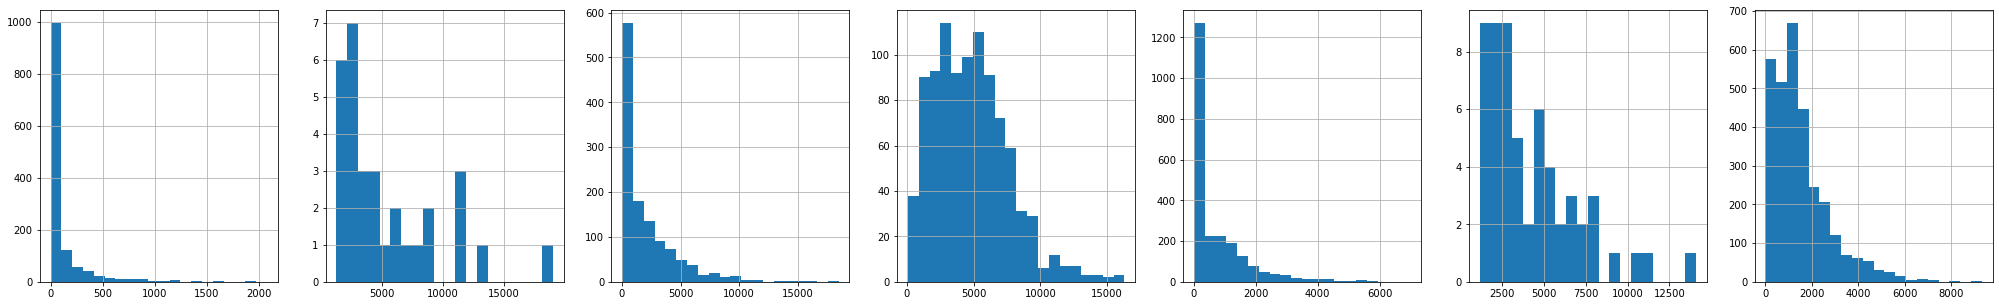

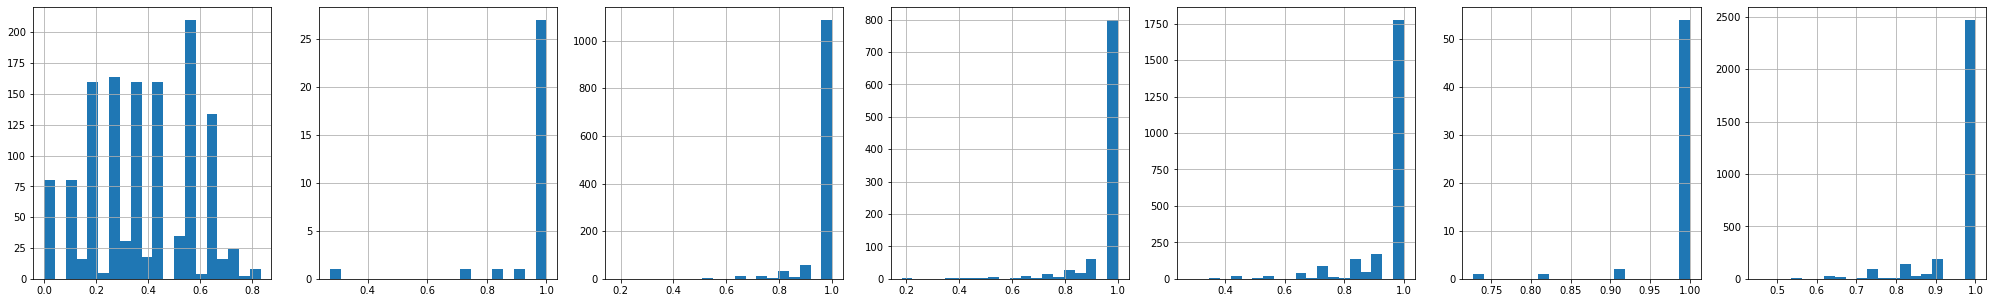

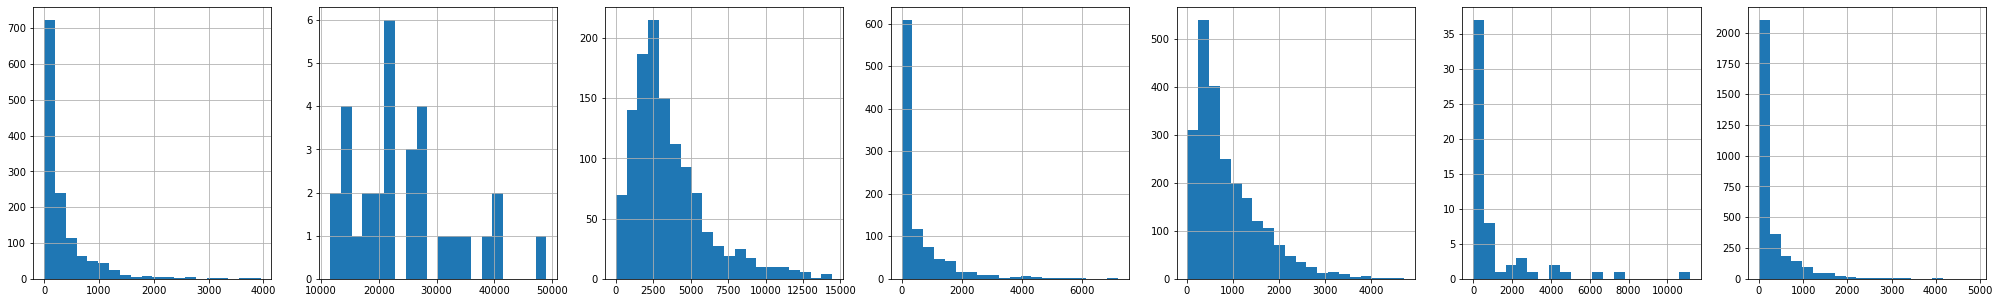

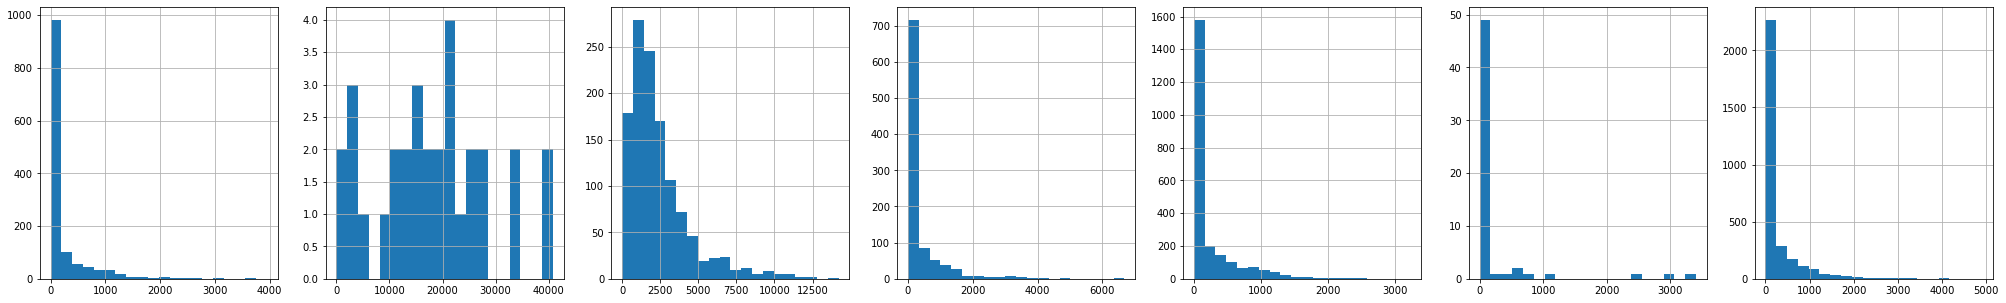

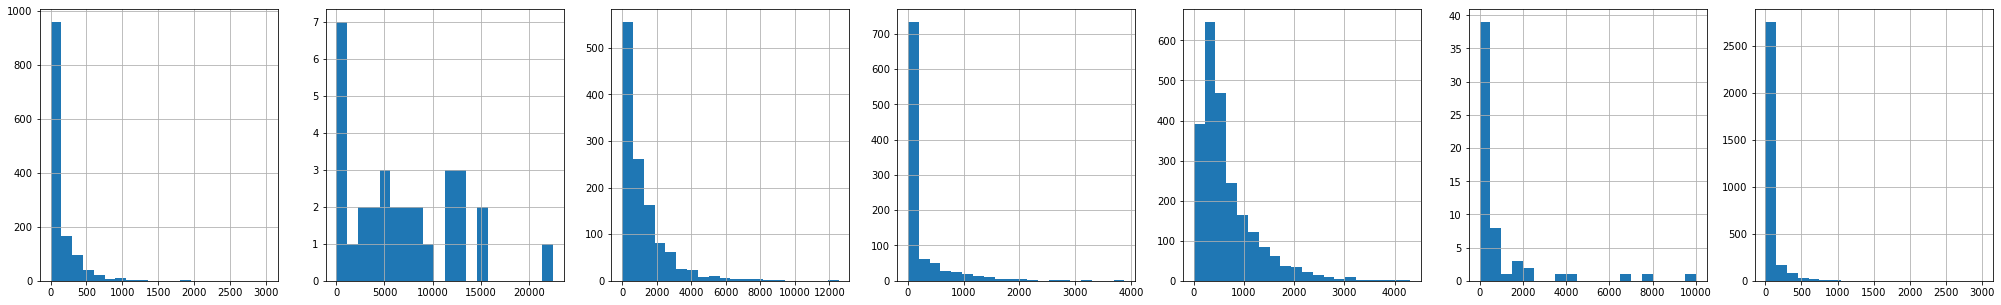

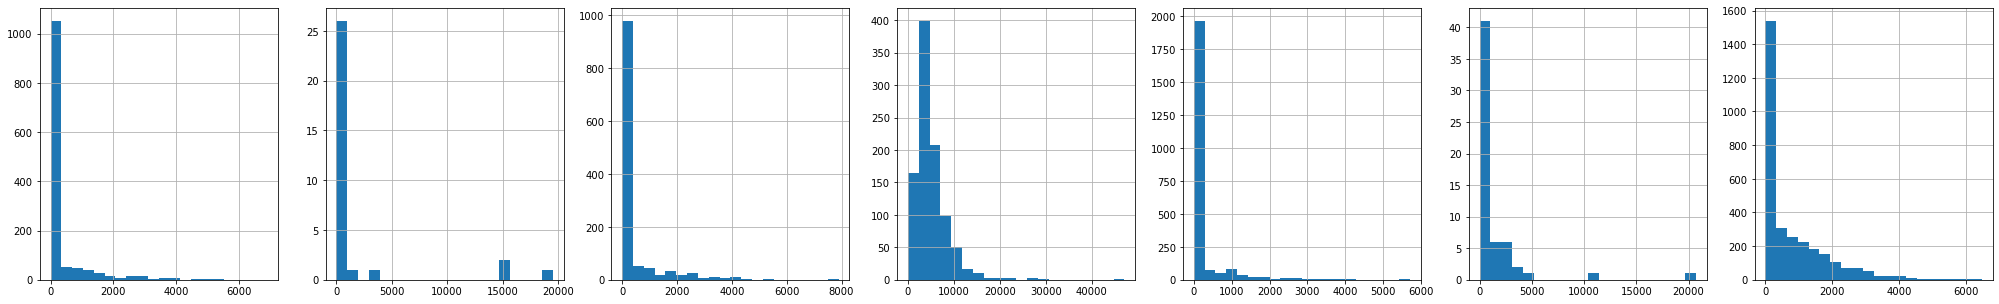

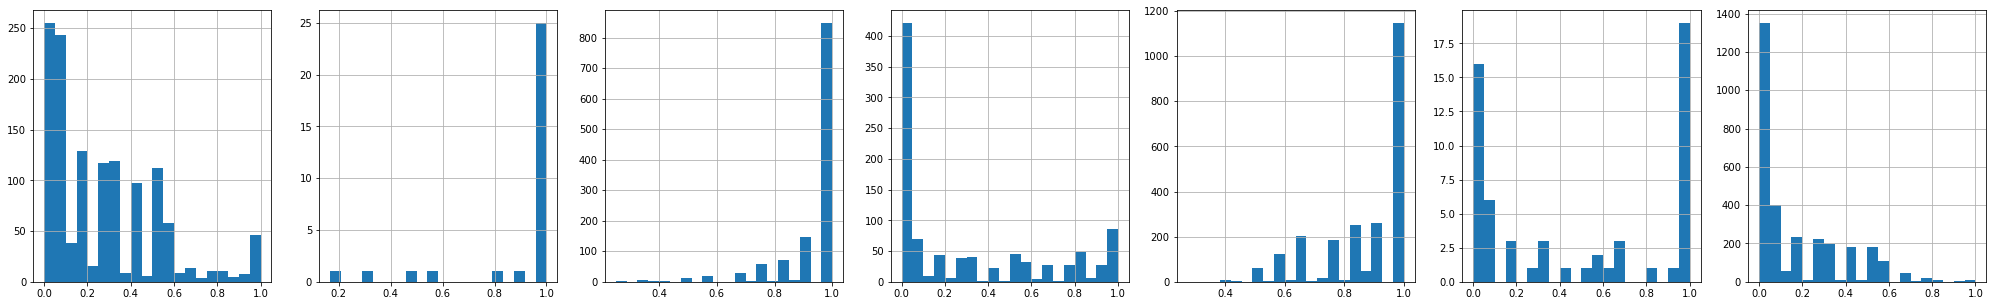

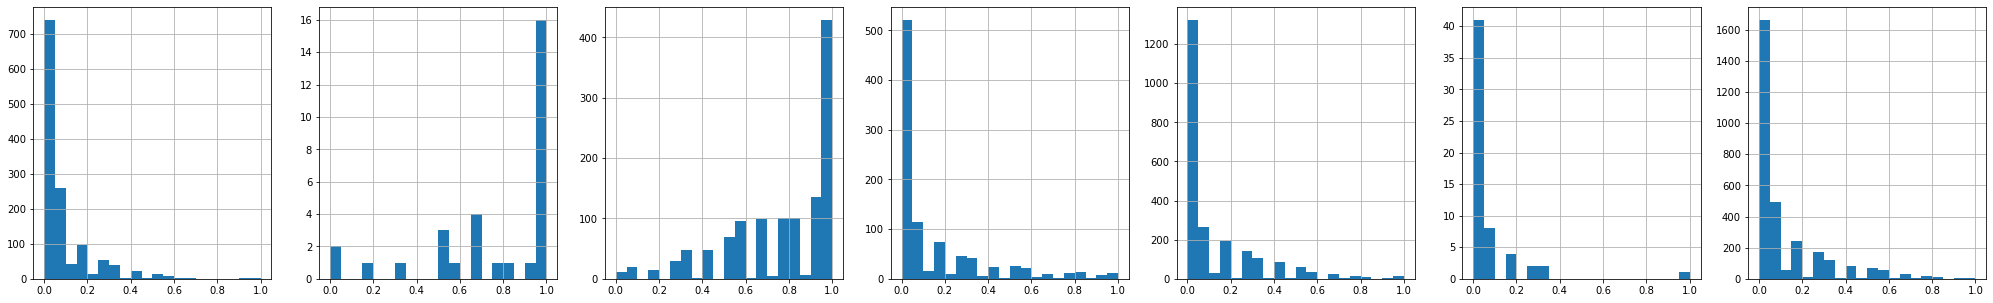

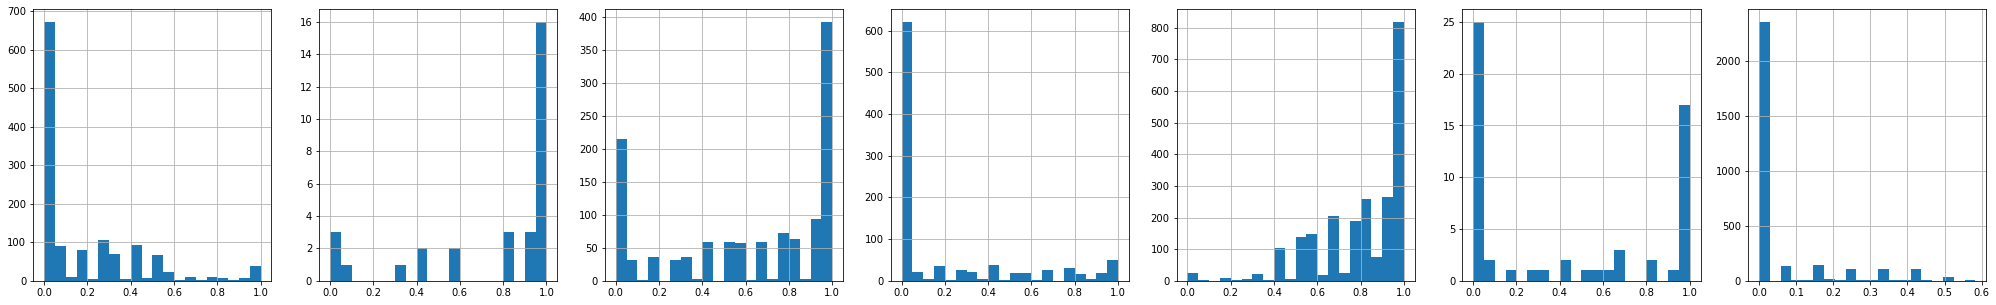

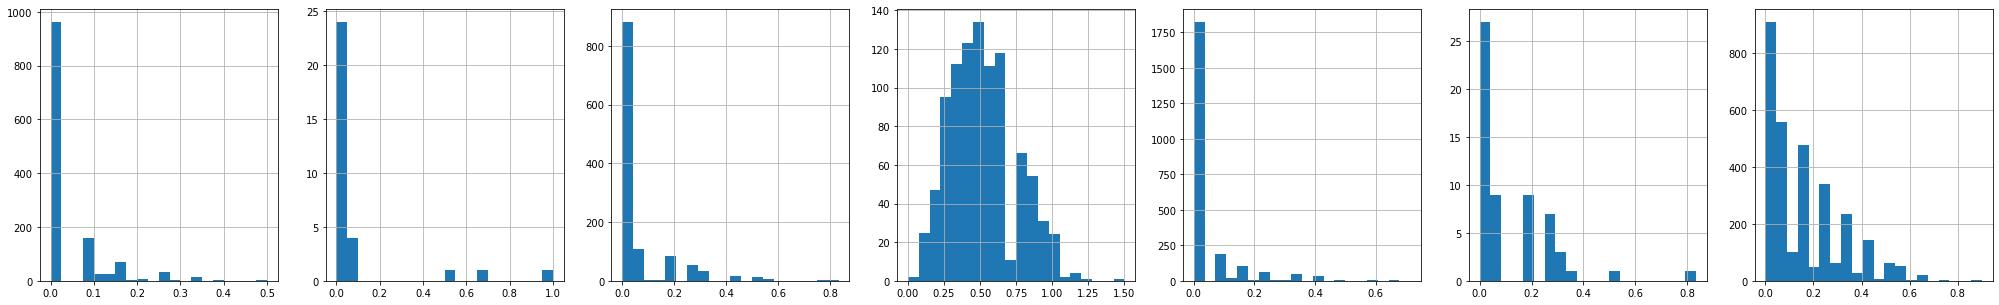

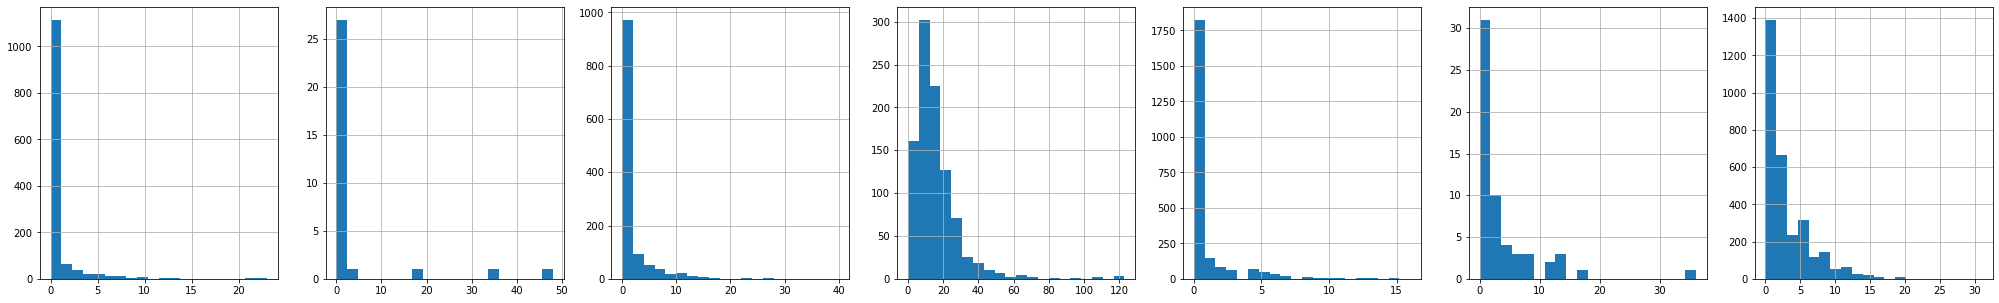

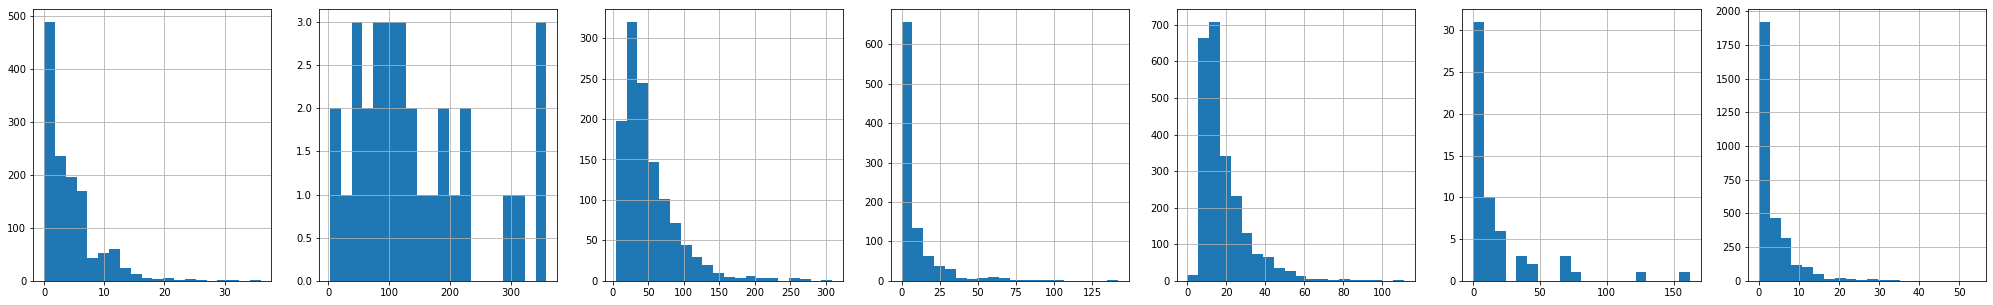

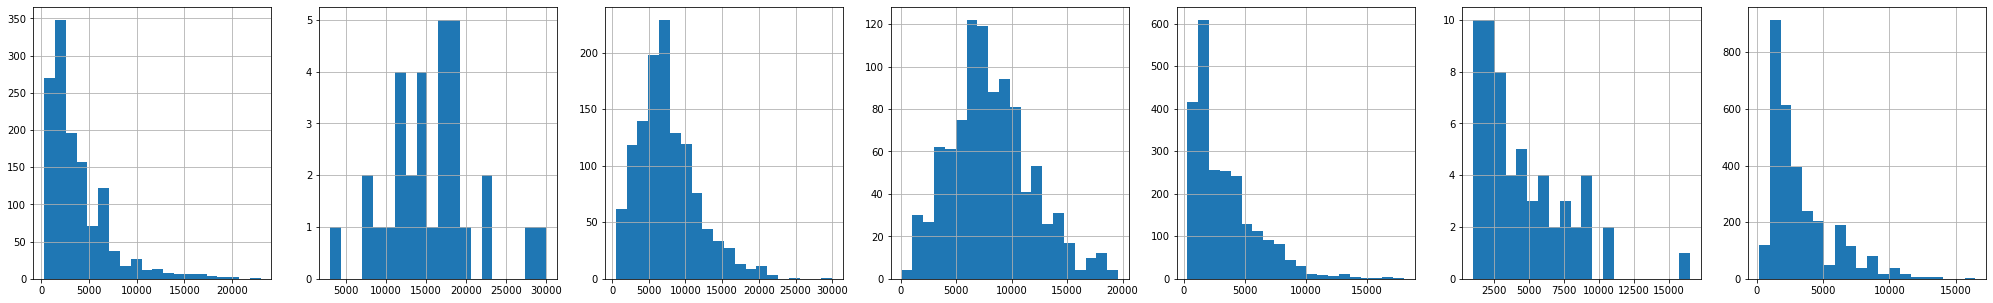

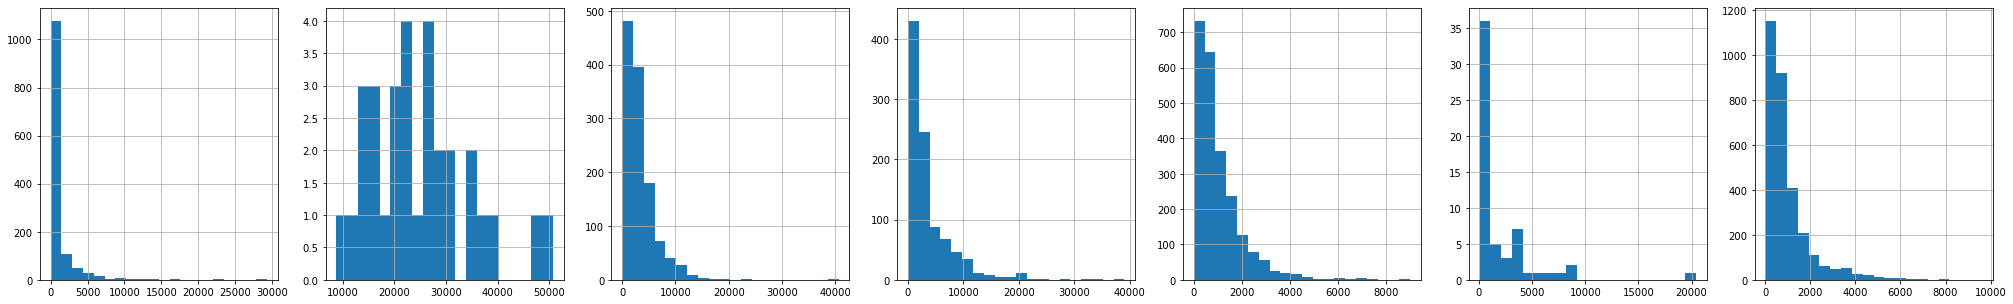

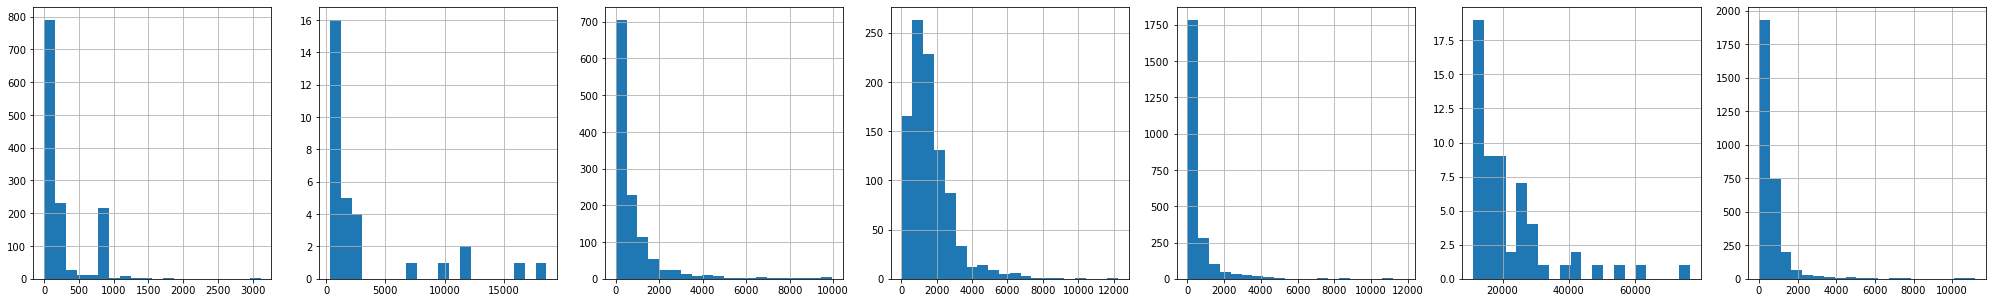

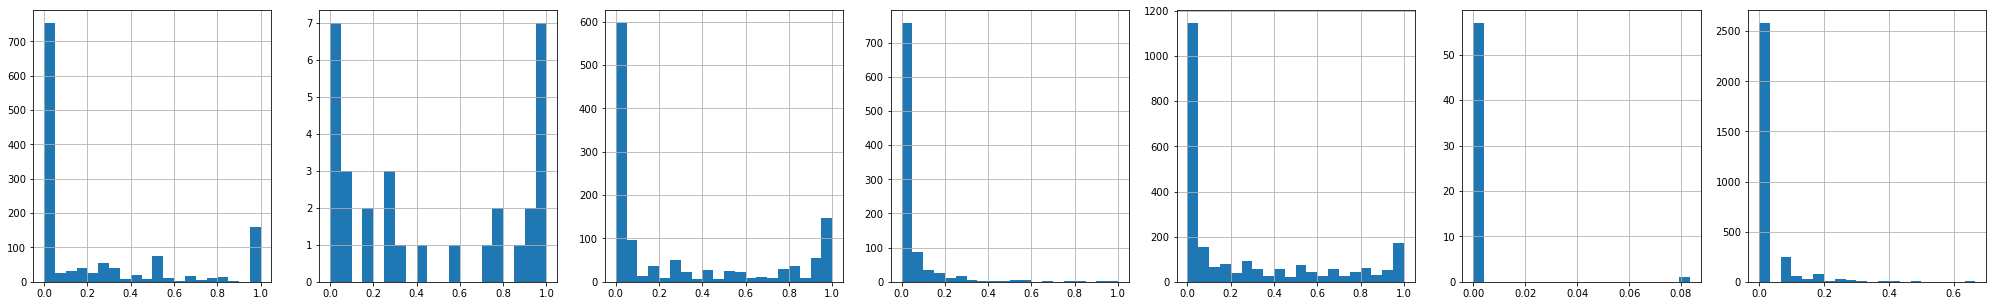

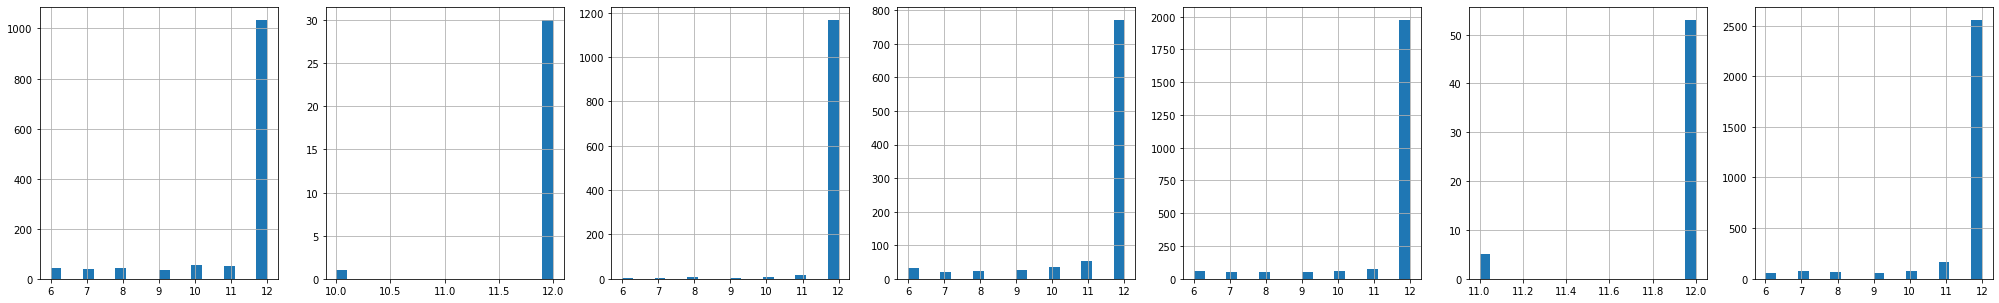

In [62]:
#plot historgram
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster=creditcard_df_cluster[creditcard_df_cluster['cluster']==j]
        cluster[i].hist(bins=20)
    plt.show()
        

In [65]:
#Principal component analysis
#The principal components of a collection of points in a real coordinate space are a sequence of p unit vectors, where the i-th vector is the direction of a line that best fits the data while being orthogonal to the first i-1 vectors.

In [66]:
#dimensionality reduction
#is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension.

In [67]:
pca =PCA(n_components=2)
principal_comp =pca.fit_transform(creditcard_df_s)
principal_comp

array([[-1.68222003, -1.0764482 ],
       [-1.13828995,  2.50651031],
       [ 0.96967485, -0.38363988],
       ...,
       [-0.92620446, -1.81078178],
       [-2.33655143, -0.65794833],
       [-0.55642408, -0.40049239]])

In [68]:
pca_df =pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])

In [69]:
pca_df

,pca1,pca2
0,-1.682220,-1.076448
1,-1.138290,2.506510
2,0.969675,-0.383640
3,-0.873624,0.043201
4,-1.599435,-0.688593
...,...,...
8945,-0.359630,-2.016145
8946,-0.564370,-1.639112
8947,-0.926204,-1.810782
8948,-2.336551,-0.657948


In [70]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':label})],axis=1)

In [71]:
pca_df

,pca1,pca2,cluster
0,-1.682220,-1.076448,6
1,-1.138290,2.506510,3
2,0.969675,-0.383640,2
3,-0.873624,0.043201,6
4,-1.599435,-0.688593,6
...,...,...,...
8945,-0.359630,-2.016145,4
8946,-0.564370,-1.639112,4
8947,-0.926204,-1.810782,4
8948,-2.336551,-0.657948,6


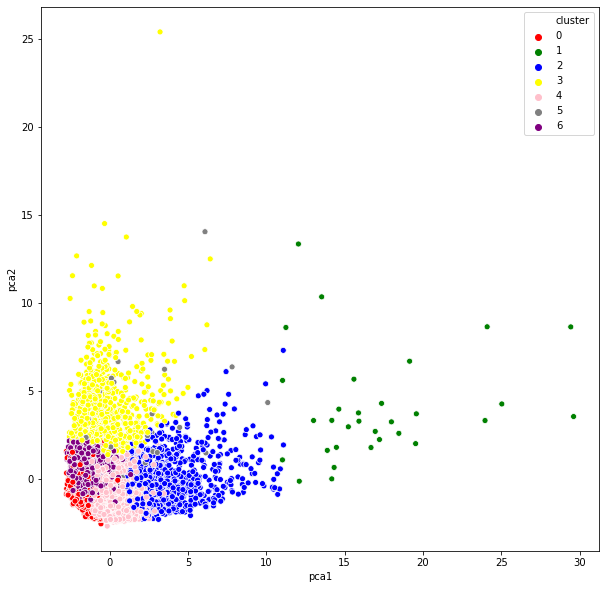

In [72]:
plt.figure(figsize=(10,10))
ax =sns.scatterplot(x="pca1",y="pca2", hue="cluster", data=pca_df,palette=['red','green','blue','yellow','pink','grey','purple'])
plt.show()